# LABORATORY SESSION - WEEK 7

### Problem 2 and 3 



### Solution

1.1 Build the BA model using preferencial attatchment rule.

C:\Users\39392\AppData\Local\Temp\ipykernel_14952\2480398635.py:34: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)  # Set a reasonable bottom limit for the y-axis


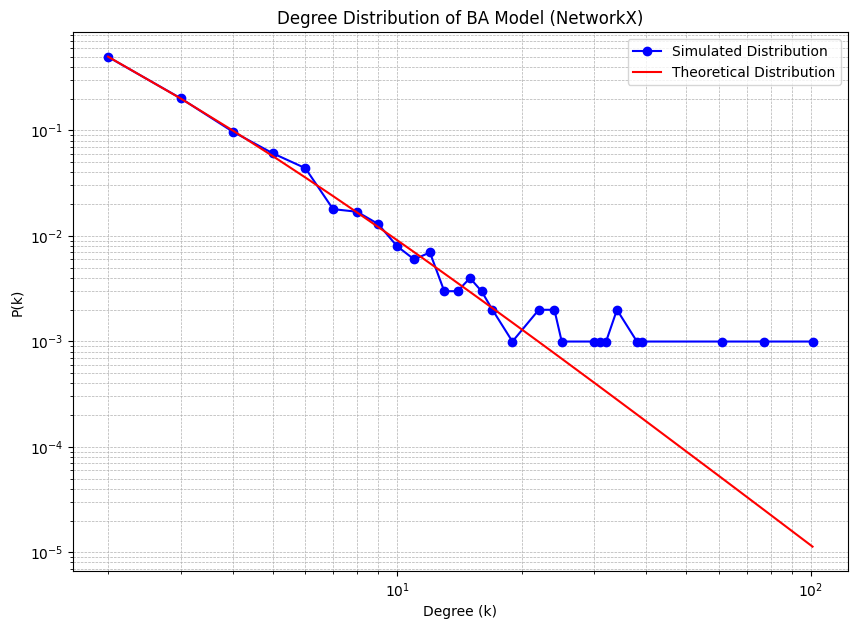

In [10]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Parameters
m0 = 5  # Initial number of nodes (ignored in networkx BA generation)
m = 2   # Number of edges to attach from a new node to existing nodes
T = 1000  # Total number of nodes in the network

# Generate the BA network using networkx
G = nx.barabasi_albert_graph(n=T + m0, m=m)

# Extract degrees of nodes
degrees = [degree for _, degree in G.degree()]

# Analyze the degree distribution
degree_counts = Counter(degrees)
degree_values, frequency = zip(*sorted(degree_counts.items()))
normalized_frequency = np.array(frequency) / sum(frequency)

# Compute theoretical degree distribution P(k) = 2m(m+1) / [k(k+1)(k+2)]
theoretical_pk = [2 * m * (m + 1) / (k * (k + 1) * (k + 2)) for k in degree_values]

# Plot the degree distribution
plt.figure(figsize=(10, 7))
plt.loglog(degree_values, normalized_frequency, 'bo-', label="Simulated Distribution")
plt.loglog(degree_values, theoretical_pk, 'r-', label="Theoretical Distribution")
plt.xlabel("Degree (k)")
plt.ylabel("P(k)")
plt.title("Degree Distribution of BA Model (NetworkX)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.ylim(bottom=0)  # Set a reasonable bottom limit for the y-axis
plt.show()


### Problem 7

Percolation analysis on ER model.

### Solution 

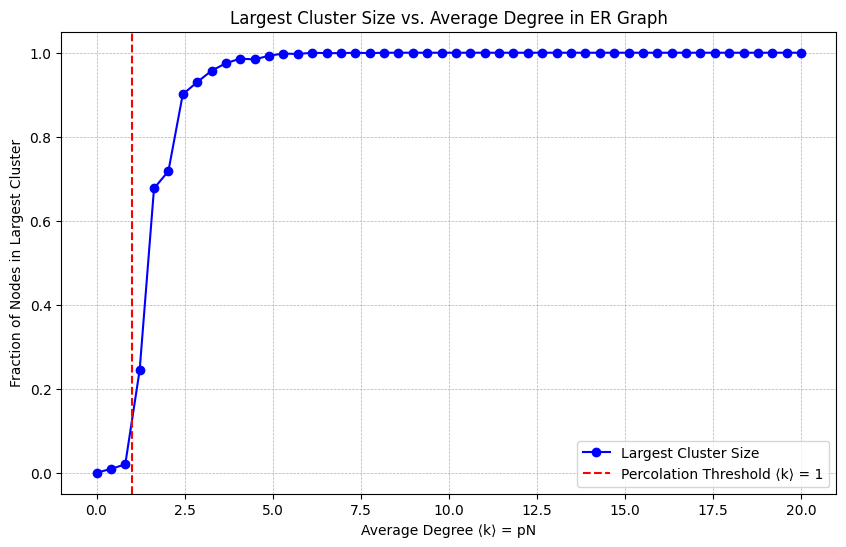

In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 1000  # Number of nodes
p_values = np.linspace(0, 0.02, 50)  # Range of edge probabilities

# Store results
average_degrees = []  # ⟨k⟩ = pN
largest_cluster_sizes = []  # Fraction of nodes in the largest cluster

# Analyze the largest cluster for different ⟨k⟩ values
for p in p_values:
    G = nx.erdos_renyi_graph(n, p)  # Generate ER graph
    if nx.is_empty(G):
        largest_cc_size = 0  # No connected components
    else:
        largest_cc = max(nx.connected_components(G), key=len)  # Largest connected component
        largest_cc_size = len(largest_cc) / n  # Normalize by total nodes
    average_degrees.append(p * n)  # Compute ⟨k⟩
    largest_cluster_sizes.append(largest_cc_size)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(average_degrees, largest_cluster_sizes, 'b-o', label="Largest Cluster Size")
plt.axvline(1, color='r', linestyle='--', label="Percolation Threshold ⟨k⟩ = 1")
plt.xlabel("Average Degree ⟨k⟩ = pN")
plt.ylabel("Fraction of Nodes in Largest Cluster")
plt.title("Largest Cluster Size vs. Average Degree in ER Graph")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()